In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Movie Senitment/Data/NM_comment_clean.xlsx')
data.head()

,Unnamed: 0,Unnamed: 0.1,Movie Name,Label,Main Comment,Comment,Cleaned
0,0.0,0.0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,1.0,1.0,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,2.0,2.0,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,3.0,3.0,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,4.0,4.0,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4006 non-null   float64
 1   Unnamed: 0.1  4006 non-null   float64
 2   Movie Name    4006 non-null   object 
 3   Label         4006 non-null   object 
 4   Main Comment  4006 non-null   object 
 5   Comment       4006 non-null   object 
 6   Cleaned       4006 non-null   object 
dtypes: float64(2), object(5)
memory usage: 219.2+ KB


In [5]:
data.drop(columns={'Unnamed: 0','Unnamed: 0.1'},axis=1,inplace=True)

In [6]:
data.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,neg,1293
1,ntr,517
2,pos,2196


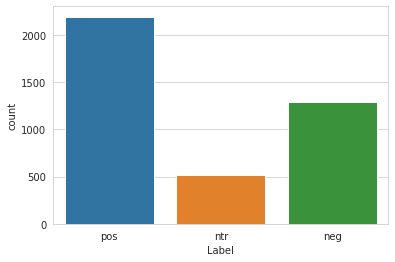

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = data)

In [8]:
# Remove the Text with least words
data['length'] = data['Cleaned'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 4006


In [9]:
dataset

,Movie Name,Label,Main Comment,Comment,Cleaned,length
0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা,2
1,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি,2
2,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি,4
3,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু,2
4,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা,2
...,...,...,...,...,...,...
4001,Nishpap Munna,ntr,হযরত মোহাম্মদ (সাঃ),হযরত মোহাম্মদ (সাঃ),হযরত মোহাম্মদ সাঃ,3
4002,Nishpap Munna,ntr,হাই,হাই,হাই,1
4003,Nishpap Munna,ntr,হৃদয়ের বার্তা,হৃদয়ের বার্তা,হৃদয়ের বার্তা,2
4004,Nishpap Munna,ntr,"হে আমাদের রব, নিশ্চয় আপনি জানেন, যা আমরা গোপন ...","হে আমাদের রব, নিশ্চয় আপনি জানেন, যা আমরা গোপন ...",হে আমাদের রব নিশ্চয় আপনি জানেন যা আমরা গোপন কর...,25


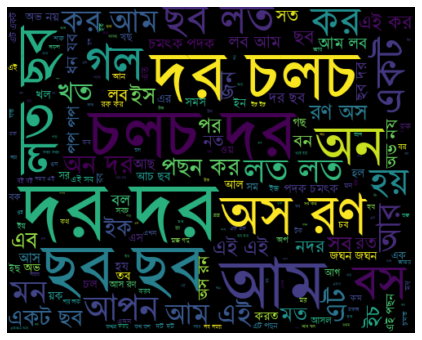

In [10]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['Cleaned']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/Movie Senitment/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [11]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Label==label].Cleaned)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  pos
Number of Documents:2196
Number of Words:5888
Number of Unique Words:794
Most Frequent Words:

সুন্দর	623
ভাল	503
খুব	254
সিনেমা	219
মুভি	179
চলচ্চিত্র	168
ভালো	155
ছবি	134
খান	130
শাকিব	121

Class Name :  neg
Number of Documents:1293
Number of Words:3259
Number of Unique Words:359
Most Frequent Words:

সিনেমা	448
ছবি	343
খারাপ	317
বাজে	289
খুব	259
ফালতু	239
বাল	138
ঘৃণা	59
মার্কা	54
মুভি	46

Class Name :  ntr
Number of Documents:517
Number of Words:3879
Number of Unique Words:1666
Most Frequent Words:

এই	82
না	57
যে	48
আমি	45
কে	44
আমার	43
ছবি	43
সাকিব	36
শাকিব	32
ও	30
Total Number of Unique Words:2277


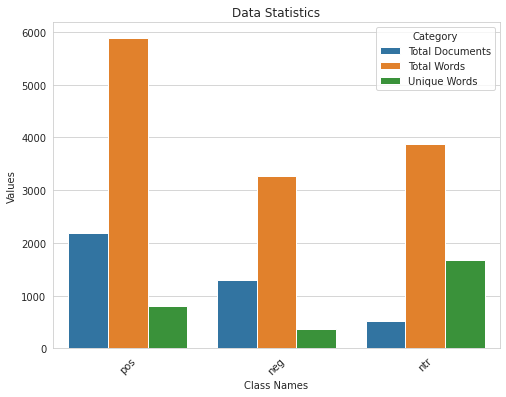

In [12]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

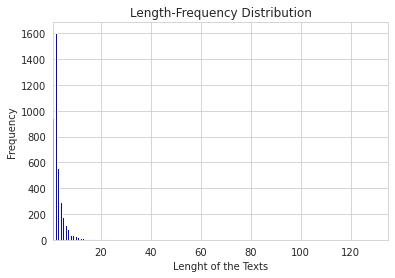

Maximum Length of a Text: 159
Minimum Length of a Text: 1
Average Length of a Text: 3.0


In [13]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

### feature extraction, label encoding, spilt

In [14]:
# Label Encoding Function 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
    
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [15]:
# Dataset Splitting Function 

def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=sentiment)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [16]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [17]:
# Unigram Tf-idf value calculation
                                            

def calc_unigram_tfidf(reviews):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [18]:
# Bi-gram Tf-idf value calculation
                                            

def calc_bigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X




In [19]:
# Tri-gram Tf-idf value calculation


def calc_trigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

    

### Classification Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [21]:
def model_defination():

    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [22]:
def model_performace(model,X_train,X_test,y_train,y_test):
   
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [23]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [24]:
path = "/content/drive/MyDrive/Movie Senitment/Nishpap Munna/json/"

In [25]:
import json
# save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.Comment,gram)
    labels = label_encoding(dataset.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 5578

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 14082

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 21421

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


### ML model with Unigram

In [26]:
accuracy1 = json.load(open('/content/drive/MyDrive/Movie Senitment/Nishpap Munna/json/ml_performance_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,84.04,84.04,84.04,84.04
DT,59.73,59.73,59.73,59.73
RF,85.16,85.16,85.16,85.16
MNB,83.79,83.79,83.79,83.79
KNN,70.82,70.82,70.82,70.82
Linear SVM,77.06,77.06,77.06,77.06
RBF SVM,78.05,78.05,78.05,78.05
SGD,86.03,86.03,86.03,86.03


In [27]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by SGD at = 86.03
Highest F1-Score achieved by SGD at = 86.03
Highest Precision Score achieved by SGD at = 86.03
Highest Recall Score achieved by SGD at = 86.03


### ML model with Bigram

In [28]:
accuracy2 = json.load(open('/content/drive/MyDrive/Movie Senitment/Nishpap Munna/json/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,80.92,80.92,80.92,80.92
DT,59.73,59.73,59.73,59.73
RF,83.79,83.79,83.79,83.79
MNB,83.29,83.29,83.29,83.29
KNN,78.30,78.30,78.30,78.30
Linear SVM,75.94,75.94,75.94,75.94
RBF SVM,77.06,77.06,77.06,77.06
SGD,84.29,84.29,84.29,84.29


In [29]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table2['Recall'] )}")

Highest Accuracy achieved by SGD at = 84.28999999999999
Highest F1-Score achieved by SGD at = 84.28999999999999
Highest Precision Score achieved by SGD at = 84.28999999999999
Highest Recall Score achieved by SGD at = 84.28999999999999


### ML model with Trigram

In [30]:
accuracy3 = json.load(open('/content/drive/MyDrive/Movie Senitment/Nishpap Munna/json/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,80.42,80.42,80.42,80.42
DT,59.73,59.73,59.73,59.73
RF,83.42,83.42,83.42,83.42
MNB,82.17,82.17,82.17,82.17
KNN,76.06,76.06,76.06,76.06
Linear SVM,74.69,74.69,74.69,74.69
RBF SVM,76.31,76.31,76.31,76.31
SGD,82.67,82.67,82.67,82.67


In [31]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by RF at = 83.42
Highest F1-Score achieved by RF at = 83.42
Highest Precision Score achieved by RF at = 83.42
Highest Recall Score achieved by RF at = 83.42


###Corpus Grams

In [32]:
cv,feature_vector = calc_trigram_tfidf(data.Cleaned)
df = pd.DataFrame(feature_vector.toarray(), columns = cv.get_feature_names())
print("Shape of TF-IDF Corpus unigram=====>",feature_vector.shape,'\n')
df

Shape of TF-IDF Corpus unigram=====> (4006, 12034) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,অংশ,অংশ আছে,অখিলআধান,অগ্রিম,অগ্রিম শুভেচ্ছা,অজান্তে,অজান্তে তার,অজান্তে তার অজান্তে,অজান্তে তার অজান্তেই,অজান্তেই,...,ৰহমানেৰ ৰাহিম এটা,ৰাহিম,ৰাহিম এটা,ৰাহিম এটা কি,৳,৷,৷ নীল,৷ নীল আকাশের,৷ফালতু,৷ফালতু মুভিটা
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
cv2,feature_vector2 = calc_bigram_tfidf(data.Cleaned)
df2 = pd.DataFrame(feature_vector2.toarray(), columns = cv2.get_feature_names())
print("Shape of TF-IDF Corpus bigram=====>",feature_vector2.shape,'\n')
df2

Shape of TF-IDF Corpus bigram=====> (4006, 7173) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,অংশ,অংশ আছে,অখিলআধান,অগ্রিম,অগ্রিম শুভেচ্ছা,অজান্তে,অজান্তে তার,অজান্তেই,অজান্তেই হাত,অতিথিপরায়ণ,...,য়েখানে লাস,ৰহমানেৰ,ৰহমানেৰ ৰাহিম,ৰাহিম,ৰাহিম এটা,৳,৷,৷ নীল,৷ফালতু,৷ফালতু মুভিটা
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
cv3,feature_vector3 = calc_unigram_tfidf(data.Cleaned)
df3 = pd.DataFrame(feature_vector3.toarray(), columns = cv3.get_feature_names())
print("Shape of TF-IDF Corpus trigram=====>",feature_vector3.shape,'\n')
df3

Shape of TF-IDF Corpus trigram=====> (4006, 2277) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,অংশ,অখিলআধান,অগ্রিম,অজান্তে,অজান্তেই,অতিথিপরায়ণ,অতিরিক্ত,অত্যন্ত,অথচ,অথবা,...,্যর্থ,্যা,্যারান্টি,্যিই,য়েখানে,ৰহমানেৰ,ৰাহিম,৳,৷,৷ফালতু
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Final Model

 - Selected feature: Unigram
 - Selected model: SGDClassifier

In [35]:
# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(dataset.Cleaned)

# Encode the labels
lables = label_encoding(dataset.Label,False)

# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 2277

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


In [36]:
from sklearn.linear_model import SGDClassifier
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=5)

In [37]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([2, 1, 0, 0, 1, 1, 0, 1, 2, 2])

In [38]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 98.72%
Test Accuracy is : 96.26%


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       259
           1       0.88      0.91      0.90       103
           2       0.97      0.98      0.97       440

    accuracy                           0.96       802
   macro avg       0.95      0.95      0.95       802
weighted avg       0.96      0.96      0.96       802



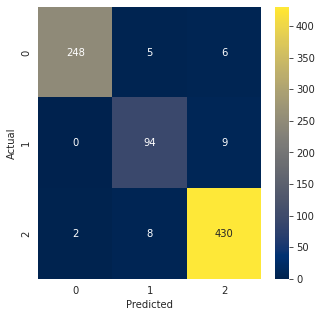

In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="cividis")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


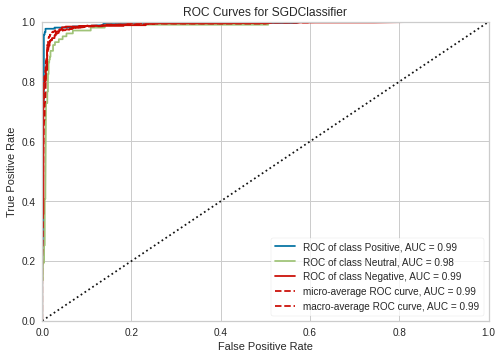

In [42]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifier1, classes=["Positive", "Neutral", "Negative"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   